# Project 2: Time Series Data
Zhicong Ma

### 1 Dataset Information
- The "Libraries - WiFi Usage (2011-2014)" dataset contains the number of WiFi sessions per month provided at Chicago Public Library locations from 2011 to 2014.
- The data source is [Chicago Data Portal](https://data.cityofchicago.org/Education/Libraries-WiFi-Usage-2011-2014-/vbts-zqt4).
- I'm interested in the WiFi usage trend over time and want to see if it can fit to a linear model and thus make predictions on future WiFi usage.

### 2 Descriptive Plot of Data

In [13]:
import time_series

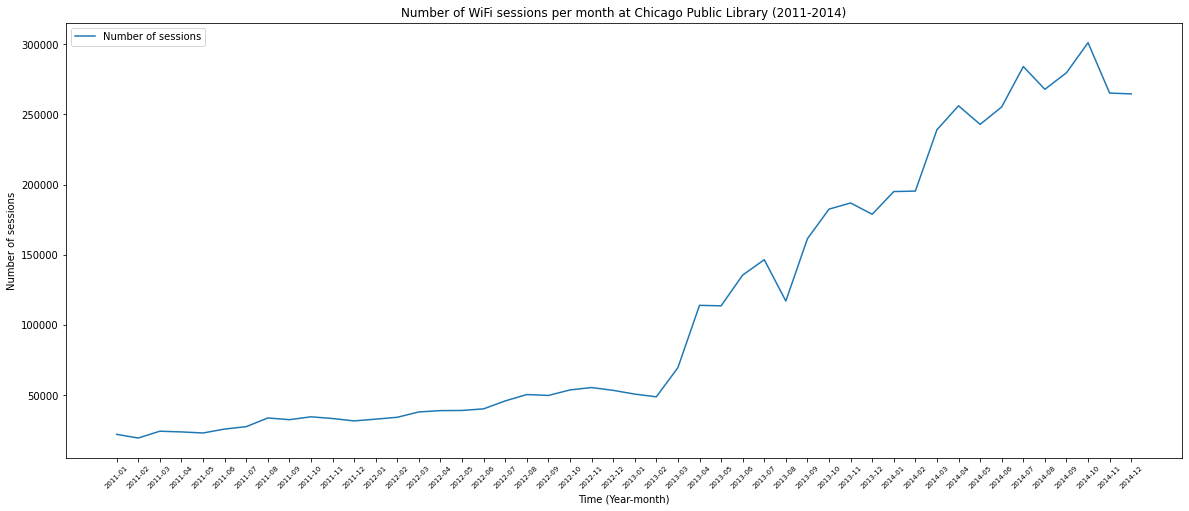

In [14]:
wifi_usage_data = time_series.TimeSeries("Libraries Wifi.csv", 0, 1, 2)  # Create an instance of TimeSeries class
time_series.TimeSeries.line_plot(wifi_usage_data.timestamps,
                                 wifi_usage_data.metrics,
                                 "Time (Year-month)",
                                 "Number of sessions",
                                 "Number of sessions",
                                 "Number of WiFi sessions per month at Chicago Public Library (2011-2014)")  # Plot the line chart

After initiating an instance of the TimeSeries class named "wifi_usage_data", I called the corresponding method to get the above line plot showing the WiFi usage trend over time. The plot looked as I expected since it has a general upwards trend. Before 2013, the WiFi usage increased slowly and steadily. After 2013, the WiFi usage increased rapidly and shows violent fluctuations. There are significant drops in summer and winter, and significant increases in spring and autumn.

Given the pattern shown above, I assume a polynomial model or linear model can be used to fit the data.

### 3 Moving Average Calculation

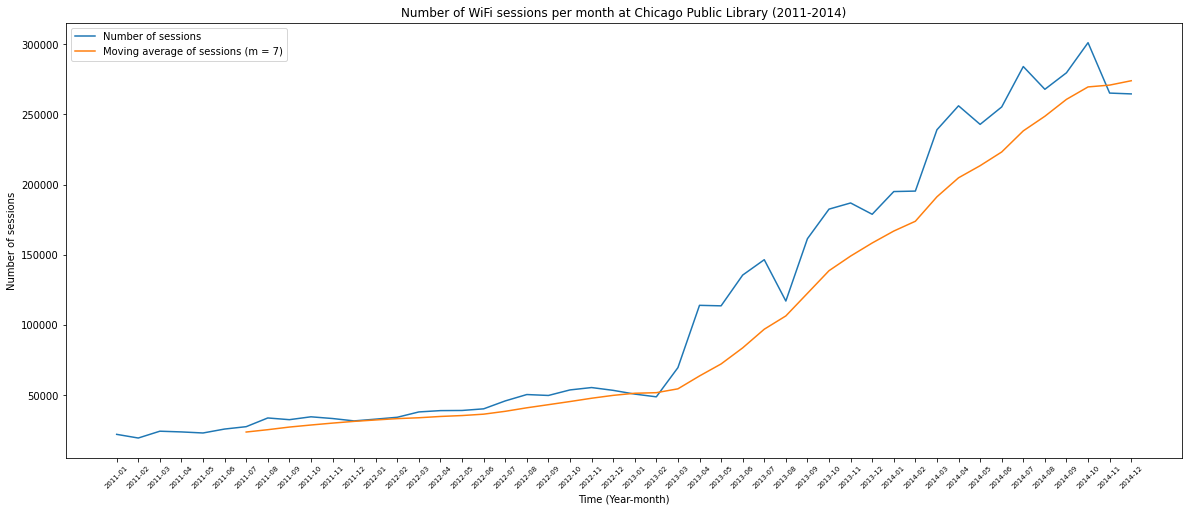

In [15]:
wifi_usage_data.get_moving_average(7)  # Compute the moving average with m(window size) = 7
time_series.TimeSeries.line_plot(wifi_usage_data.timestamps,
                                 wifi_usage_data.metrics,
                                 "Time (Year-month)",
                                 "Number of sessions",
                                 "Number of sessions",
                                 "Number of WiFi sessions per month at Chicago Public Library (2011-2014)",
                                 [("Moving average of sessions (m = 7)", wifi_usage_data.moving_averages[7])])  # Plot the line chart with moving average

The above is the plot of the original data and its corresponding moving average result when m = 7. We can see that the moving average data is smoother than the original data.

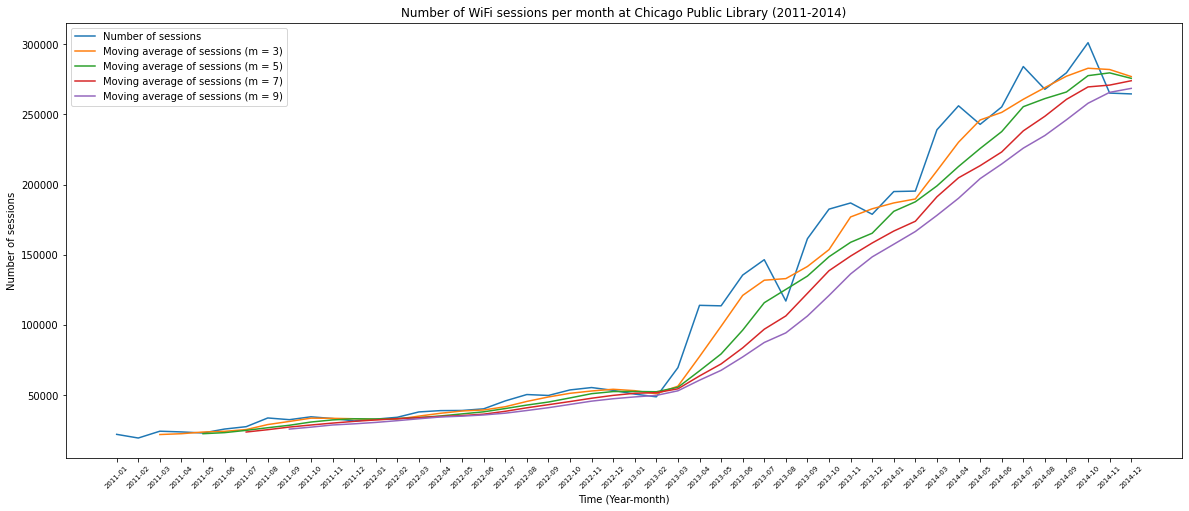

In [16]:
wifi_usage_data.get_moving_average(3)  # Compute the moving average with m = 3
wifi_usage_data.get_moving_average(5)  # Compute the moving average with m = 5
wifi_usage_data.get_moving_average(9)  # Compute the moving average with m = 9
time_series.TimeSeries.line_plot(wifi_usage_data.timestamps,
                                 wifi_usage_data.metrics,
                                 "Time (Year-month)",
                                 "Number of sessions",
                                 "Number of sessions",
                                 "Number of WiFi sessions per month at Chicago Public Library (2011-2014)",
                                 [("Moving average of sessions (m = 3)", wifi_usage_data.moving_averages[3]),
                                  ("Moving average of sessions (m = 5)", wifi_usage_data.moving_averages[5]),
                                  ("Moving average of sessions (m = 7)", wifi_usage_data.moving_averages[7]),
                                  ("Moving average of sessions (m = 9)", wifi_usage_data.moving_averages[9])])  # Plot the line chart with moving averages

From the above plot, we notice that as m(the size of window when computing moving average) increases, the moving average gets smoother with fewer fluctuations, and the value of y-axis gets smaller.

### 4 Linear Regression Model on Moving Average

Now using linear regression model to fit a moving average. Here I choose the moving average with m = 7.

#### 4.1 Model 1

In Model 1, the y-intercept is set to be zero.

In [17]:
x = wifi_usage_data.preprocess_before_linear_regression(7)[0]  # preprocess x-axis data
y = wifi_usage_data.preprocess_before_linear_regression(7)[1]  # preprocess y-axis data
[slope, y_intercept], r_square = time_series.TimeSeries.linear_regression(x,
                                                                          y,
                                                                          True)  # get linear regression info
print("Model 1: \nslope: {} \ny-intercept: {} \nR-square: {}".format(slope,
                                                                     y_intercept,
                                                                     r_square[0]))  # print info of Model 1

Model 1: 
slope: 4350.930286859161 
y-intercept: 0 
R-square: 72885888019.7098


After applying the linear regression, we get the above statistics for the model. As expected, the y-intercept is 0, the slope is a positive number since the number of sessions has an upwards trend over time.

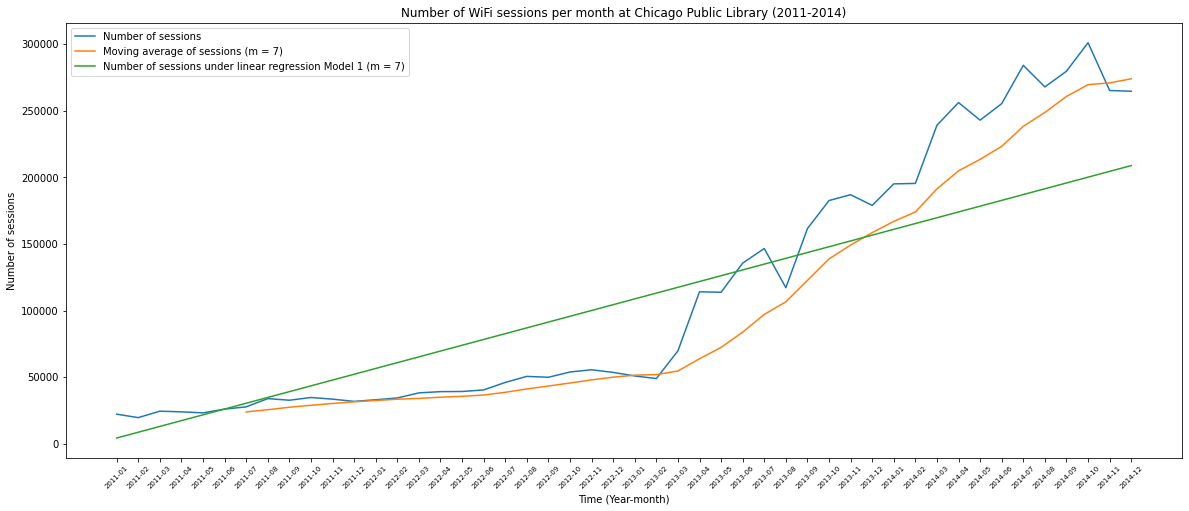

In [18]:
time_series.TimeSeries.line_plot(wifi_usage_data.timestamps,
                                 wifi_usage_data.metrics,
                                 "Time (Year-month)",
                                 "Number of sessions",
                                 "Number of sessions",
                                 "Number of WiFi sessions per month at Chicago Public Library (2011-2014)",
                                 [("Moving average of sessions (m = 7)",
                                   wifi_usage_data.moving_averages[7]),
                                  ("Number of sessions under linear regression Model 1 (m = 7)",
                                   wifi_usage_data.predict_y_hat(slope, y_intercept))])  # Plot the line char with moving average and linear regression model

Here we plot the predictive y values under linear regression with the moving average and the original data. Note that although the moving average doesn't have the first six values, we plotted the predictive first six values by the linear regression model because the model can be used to compute any predictive value of a given time.

In [19]:
print(
    "Value of y_n-1: {}\nPredictive value of y_n: {}\nPredictive value of y_n+5: {}\nPredictive value of y_n+10: {}".format(
        wifi_usage_data.moving_averages[7][-1], wifi_usage_data.predict_data_point(slope, y_intercept, 1),
        wifi_usage_data.predict_data_point(slope, y_intercept, 6),
        wifi_usage_data.predict_data_point(slope, y_intercept, 11)))  # print predictive values

Value of y_n-1: 273988.0
Predictive value of y_n: 213195.5840560989
Predictive value of y_n+5: 234950.2354903947
Predictive value of y_n+10: 256704.8869246905


The last value of moving average data is 273988, and the predictive value of 2015-01 given by Model 1 is 213196, the predictive value of 2015-05 is 234950, and the predictive value of 2015-10 is 256705. All the predictive values are much smaller than the last value of moving average. This might not be a good prediction since the overall trend of WiFi usage is upwards. We can later compare the result of Model 1 with Model 2 by R-square.

#### 4.2 Model 2

In Model 2, the y-intercept is not set to be zero.

In [20]:
[slope_2, y_intercept_2], r_square_2 = time_series.TimeSeries.linear_regression(x, y)  # get info of Model 2
print("Model 2: \nslope: {} \ny-intercept: {} \nR-square: {}".format(slope_2,
                                                                     y_intercept_2,
                                                                     r_square_2[0]))  # print info of Model 2

Model 2: 
slope: 6562.419229745217 
y-intercept: -72630.6580696941 
R-square: 36845254678.157845


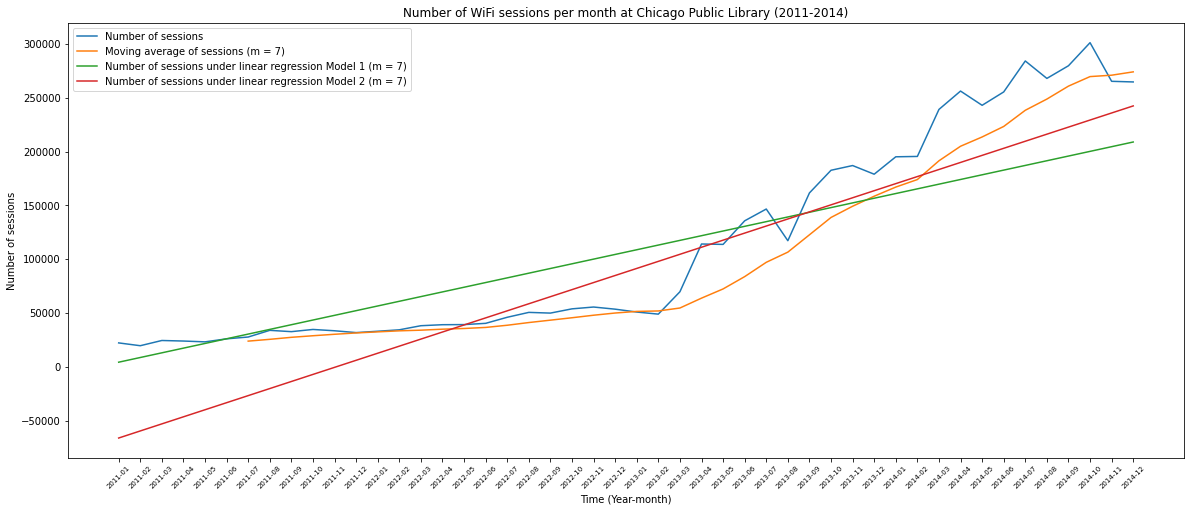

In [21]:
time_series.TimeSeries.line_plot(wifi_usage_data.timestamps,
                                 wifi_usage_data.metrics,
                                 "Time (Year-month)",
                                 "Number of sessions",
                                 "Number of sessions",
                                 "Number of WiFi sessions per month at Chicago Public Library (2011-2014)",
                                 [("Moving average of sessions (m = 7)",
                                   wifi_usage_data.moving_averages[7]),
                                  ("Number of sessions under linear regression Model 1 (m = 7)",
                                   wifi_usage_data.predict_y_hat(slope, y_intercept)),
                                  ("Number of sessions under linear regression Model 2 (m = 7)",
                                   wifi_usage_data.predict_y_hat(slope_2, y_intercept_2))])  # Plot the line char with moving average, Model 1 and Model 2

In [22]:
print(
    "Value of y_n-1: {}\nPredictive value of y_n: {}\nPredictive value of y_n+5: {}\nPredictive value of y_n+10: {}".format(
        wifi_usage_data.moving_averages[7][-1], wifi_usage_data.predict_data_point(slope_2, y_intercept_2, 1),
        wifi_usage_data.predict_data_point(slope_2, y_intercept_2, 6),
        wifi_usage_data.predict_data_point(slope_2, y_intercept_2, 11)))  # print predictive values of Model 2

Value of y_n-1: 273988.0
Predictive value of y_n: 248927.88418782156
Predictive value of y_n+5: 281739.9803365476
Predictive value of y_n+10: 314552.0764852738


In Model 2, each predictive value is greater than its counterpart in Model 1, and the predictive value of 2015-10 is greater than the last value of the moving average data. From the plot we can see that Model 2 has a greater slope than Model 1, and the values in Model 2 are closer to the moving average data than Model 1. The R-square of Model 2 is also smaller than Model 1. Therefore, Model 2 is a better predictive model than Model 1.

What would make the model better? I think the current model can be optimized by introducing higher order terms because the overall trend is not much like a straight line, instead, it has inflections. For example, 2013-02 is an inflection point. Before this time, the growth of WiFi usage is slow, and after this time the growth is fast. Introducing higher order term can fit these inflections.